### **Содержательная постановка задачи**

**Цель исследования:**

Предсказать вероятность наводнения в регионах.

Допущение: в выбранных данных нет географических меток, но будем считать, что они не влияют на вероятность наводнения и сами метки хранятся в отдельном файле и могут быть использованы в дальнейшем после кластеризации.

**Описание [датасета](https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset):**
Набор данных, использованный для этого анализа, содержит множество характеристик, позволяющих получить важную информацию об экологических и антропогенных факторах, влияющих на возникновение и интенсивность наводнений. К таким характеристикам относятся:

1. Интенсивность муссонов **MonsoonIntensity**: большее количество осадков во время муссонов повышает вероятность наводнений
2. Топография и дренаж **TopographyDrainage**: дренажная способность в зависимости от топографии региона. Эффективный дренаж может помочь отвести дождевую воду и снизить риск наводнений.
3. Управление водными ресурсами **RiverManagement**: качество и эффективность методов управления водными ресурсами. Надлежащее управление водными ресурсами, включая дноуглубительные работы и обслуживание берегов, может улучшить течение воды и уменьшить количество наводнений.
4. Вырубка лесов **Deforestation**: масштабы вырубки лесов в регионе. Вырубка лесов снижает способность почвы поглощать воду, увеличивая поверхностный сток и риск наводнений.
5. Урбанизация **Urbanization**: уровень урбанизации в регионе. В городских районах есть непроницаемые поверхности (асфальт, бетон), которые препятствуют проникновению воды, повышая риск наводнений.
6. Изменение климата **ClimateChange**: влияние изменения климата на регион. Изменение климата может привести к более экстремальным режимам выпадения осадков, в том числе к проливным дождям, которые могут вызвать наводнения.
7. Качество плотин **DamsQuality**: качество и техническое состояние плотин. Плотины, находящиеся в хорошем состоянии, могут сдерживать наводнения, а плотины с конструктивными дефектами могут разрушаться и вызывать катастрофические наводнения.
8. Заиливание **Siltation**: степень заиливания рек и водохранилищ. Накопление отложений в реках (заиливание) снижает пропускную способность и повышает риск наводнений.
9. Сельскохозяйственные методы **AgriculturalPractices**: виды и устойчивость сельскохозяйственных методов. Интенсификация сельского хозяйства может привести к вырубке лесов, чрезмерному использованию удобрений и пестицидов, а также к неправильным методам орошения, что снижает биоразнообразие почвы и повышает риск наводнений.
10. Посягательства на окружающую среду **Encroachments**: степень посягательства на поймы рек и естественные водные пути. Строительство в районах, подверженных наводнениям, препятствует естественному течению воды и повышает риск наводнений.
11. Неэффективная подготовка к стихийным бедствиям **IneffectiveDisasterPreparedness**: отсутствие планов действий в чрезвычайных ситуациях, систем оповещения и моделирования повышает негативное воздействие наводнений.
12. Дренажные системы **DrainageSystems**: хорошо обслуживаемые и правильно подобранные дренажные системы помогают отводить дождевую воду и снижают риск наводнений.
13. Уязвимость прибрежных районов **CoastalVulnerability**: низменные прибрежные районы подвержены наводнениям из-за штормовых волнений и повышения уровня моря.
14. Оползни **Landslides**: крутые склоны и неустойчивые грунты более подвержены оползням.
15. Водоразделы **Watersheds**: в регионах с большим количеством водоразделов риск наводнений может быть выше или ниже в зависимости от различных факторов.
16. Ухудшение состояния инфраструктуры **DeterioratingInfrastructure**: засоренные водопропускные трубы, поврежденные дренажные каналы и другие недостатки инфраструктуры могут повысить риск наводнений.
17. Оценка численности населения **PopulationScore**: густонаселенные районы могут понести более серьезные потери.
18. Уничтожение водно-болотных угодий **WetlandLoss**: водно-болотные угодья действуют как естественные губки, поглощая избыток воды и помогая предотвращать наводнения.
19. Неадекватное планирование **InadequatePlanning**: городское планирование, не учитывающее риск наводнений, повышает уязвимость сообществ.
20. Политические факторы **PoliticalFactors**: такие факторы, как коррупция и отсутствие политической воли для инвестирования в дренажную инфраструктуру, могут затруднить управление рисками наводнений.
21. Вероятность наводнения **FloodProbability**: общая вероятность наводнения в регионе. Это целевая переменная для прогнозного анализа. Это целевая переменная.

Исходя из описания датасета, уберем следующие признаки:

11 Неэффективная подготовка к стихийным бедствиям **IneffectiveDisasterPreparedness** - отражает последствие, а не вероятность риска

14 Оползни **Landslides** - чаще является следствием, а не причиной

15 Водоразделы **Watersheds** - зависит от других факторов (например, топографии)

17 Оценка численности населения **PopulationScore** - описывает влияние риска, а не вероятность

19 Неадекватное планирование **InadequatePlanning** - описывает влияние риска, а не вероятность

20 Политические факторы **PoliticalFactors** - описывает влияние риска, а не вероятность

И следующий признак выделяем, как целевую переменную:

21 Вероятность наводнения **FloodProbability**


### Подготовка данных

In [ ]:
# загружаем папку с файлами с репозитария на гитхабе
!git clone 'https://github.com/netomara/math2025'

fatal: destination path 'math2025' already exists and is not an empty directory.


In [ ]:
import pandas as pd
# читаем наш источник данных
df = pd.read_csv('math2025/flood.csv')
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


В наших данных нет пропусков, поэтому данный шаг предобработки данных мы пропускаем. Кроме того, все значения признаков являются числовыми, поэтому преобразовывать переменные с помощью кодирования не понадобится

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

Оставляем только необходимые для регрессии данные:

In [ ]:
df_features = df.iloc[:,list(range(0, 10))+[11, 12, 15, 17, 20]]
df_features.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,DrainageSystems,CoastalVulnerability,DeterioratingInfrastructure,WetlandLoss,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,10,7,3,3,0.450
1,8,4,5,7,7,9,1,5,5,4,9,2,1,9,0.475
2,3,10,4,1,7,5,4,7,4,9,7,4,6,8,0.515
3,4,4,2,7,3,4,1,4,6,4,4,2,8,6,0.520
4,3,7,5,2,5,8,5,2,7,5,7,6,3,4,0.475


Посмотрим на разбросы значений переменных

In [ ]:
df_features.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,DrainageSystems,CoastalVulnerability,DeterioratingInfrastructure,WetlandLoss,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,5.006060,4.999920,4.988200,5.00512,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,2.238107,2.247101,2.231134,2.23176,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,17.000000,17.000000,17.000000,22.00000,0.725000


В принципе почти все данные находятся в одном числовом диапозоне, поэтому перейдем к шагу анализа данных на выбросы

Посмотрим на боксплоты и гистограммы распределений

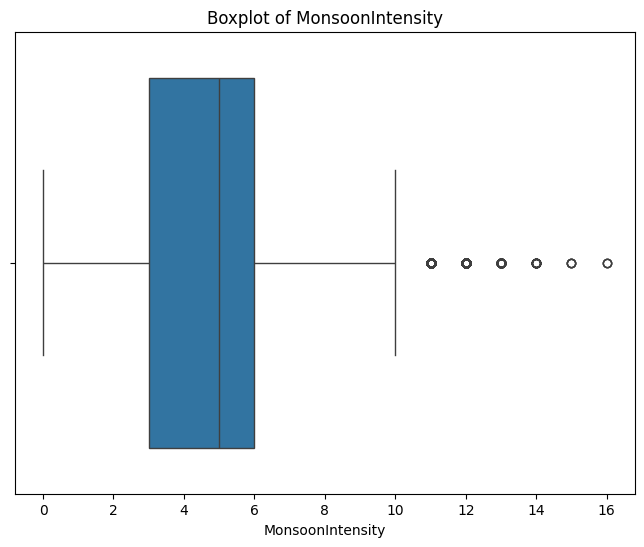

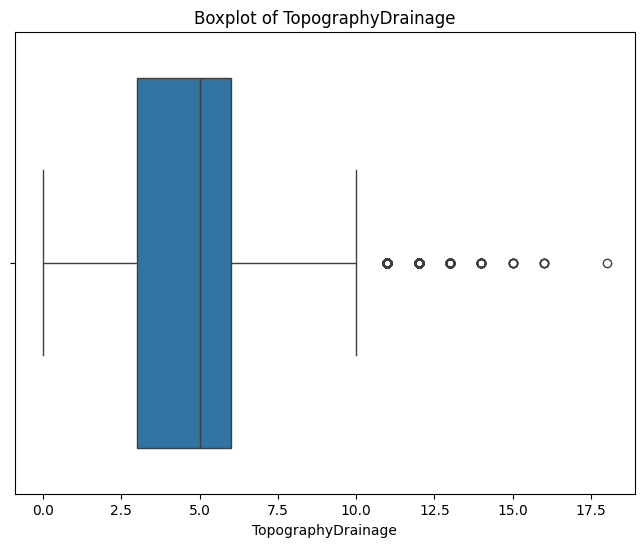

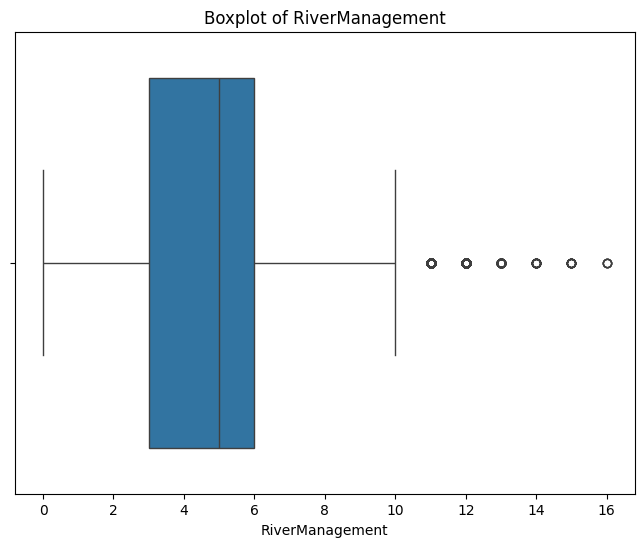

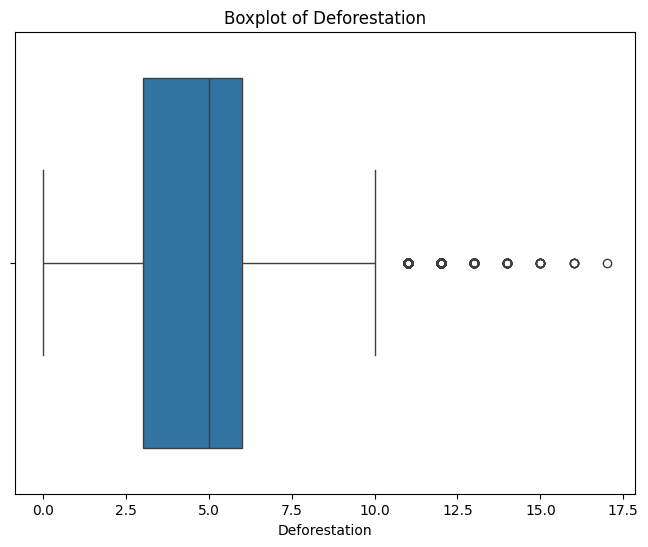

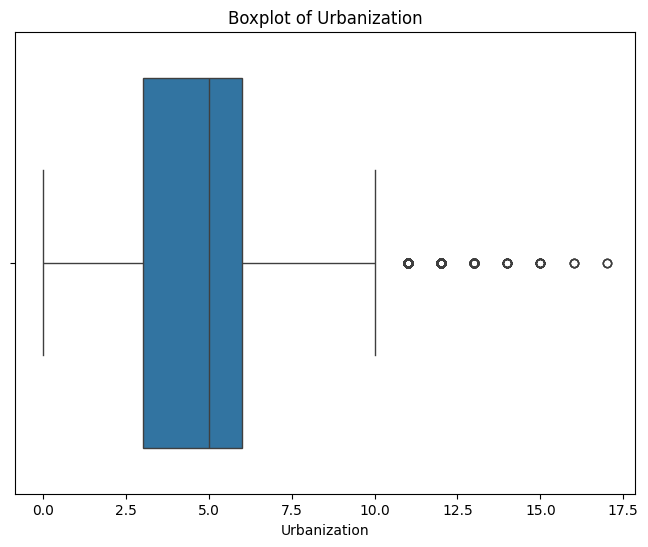

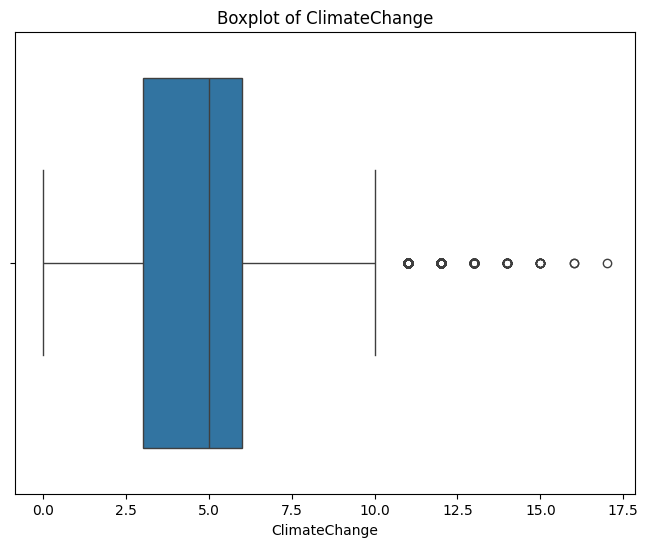

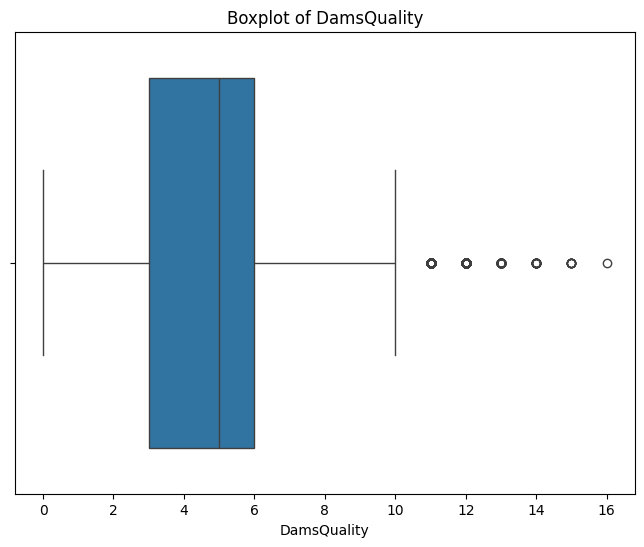

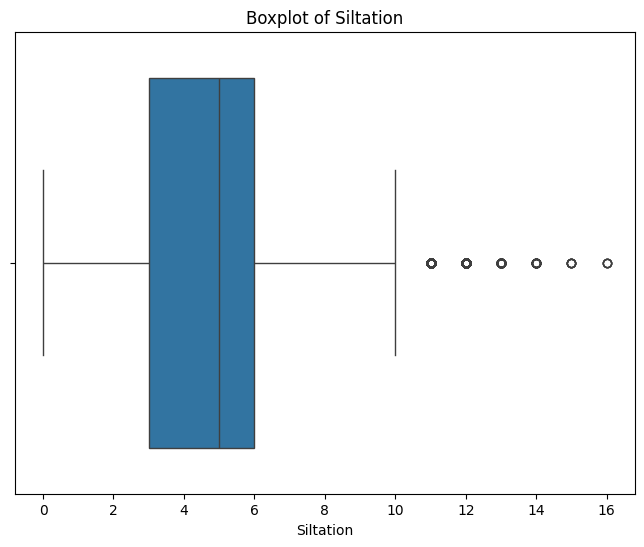

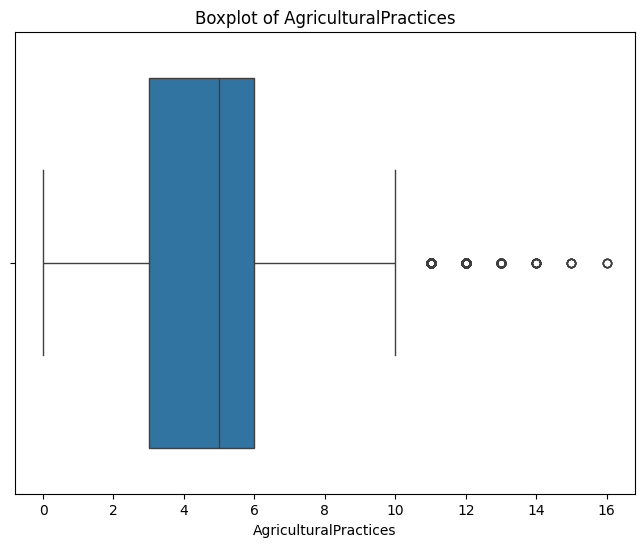

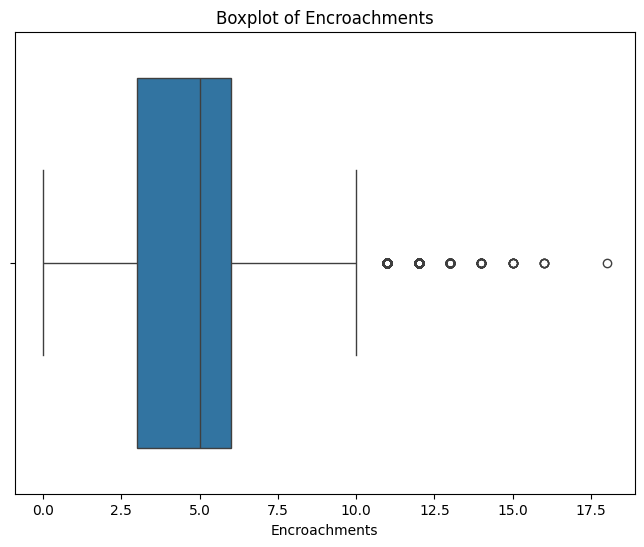

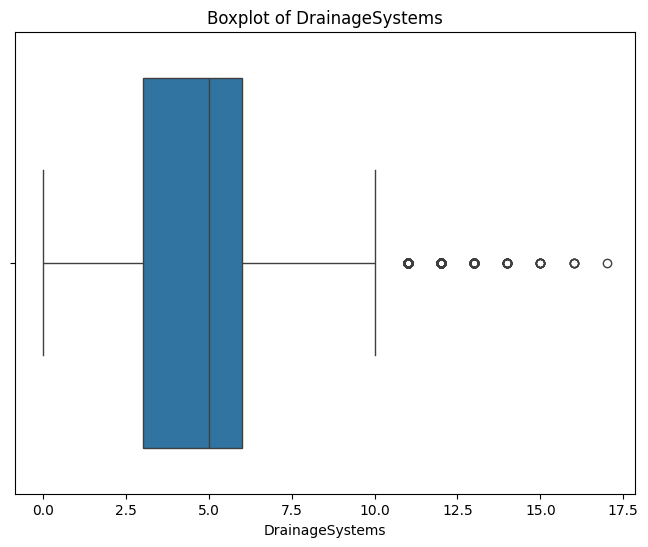

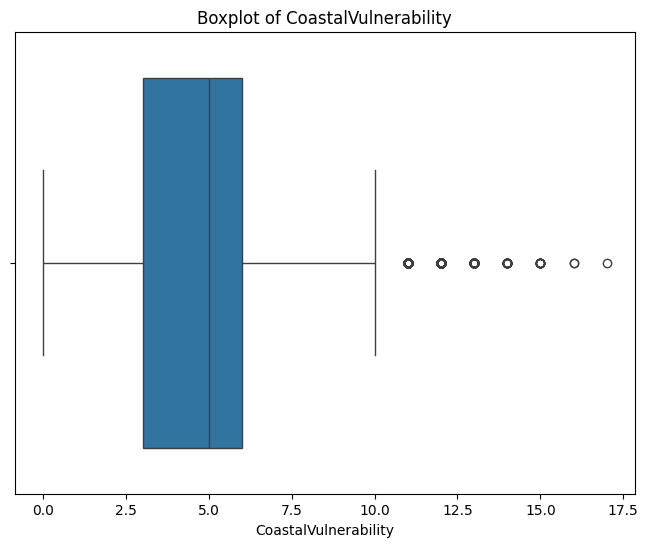

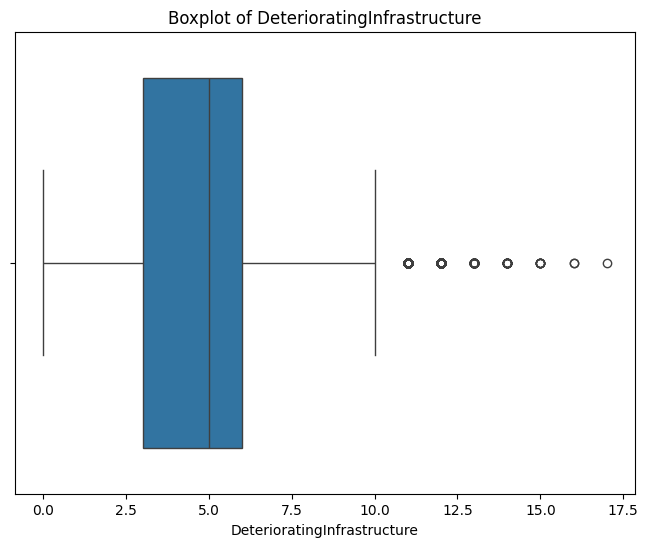

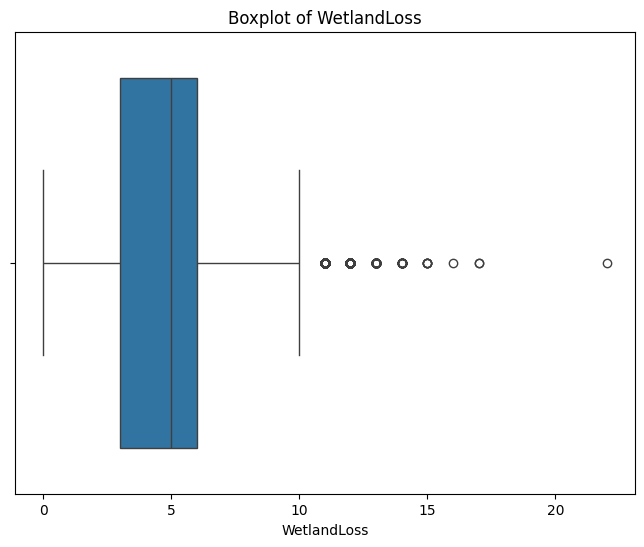

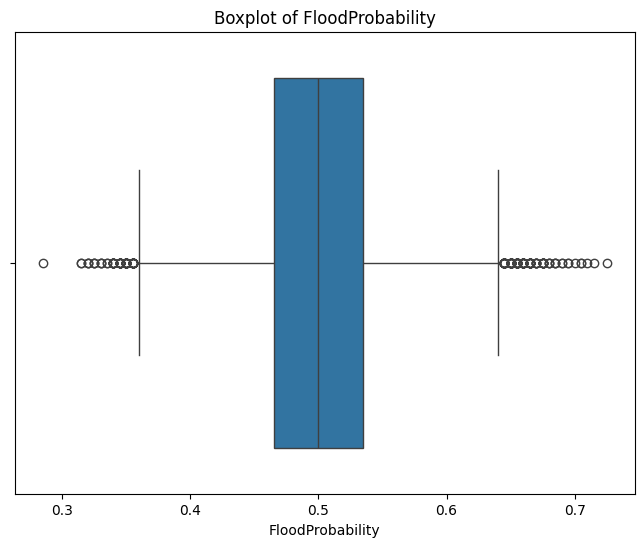

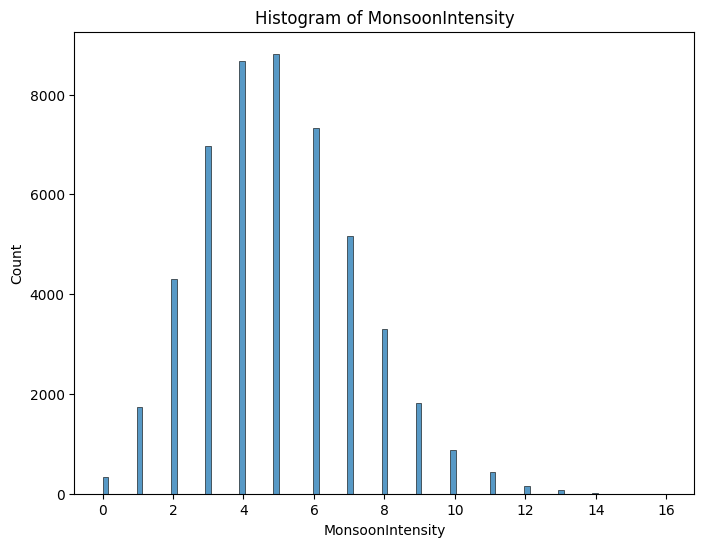

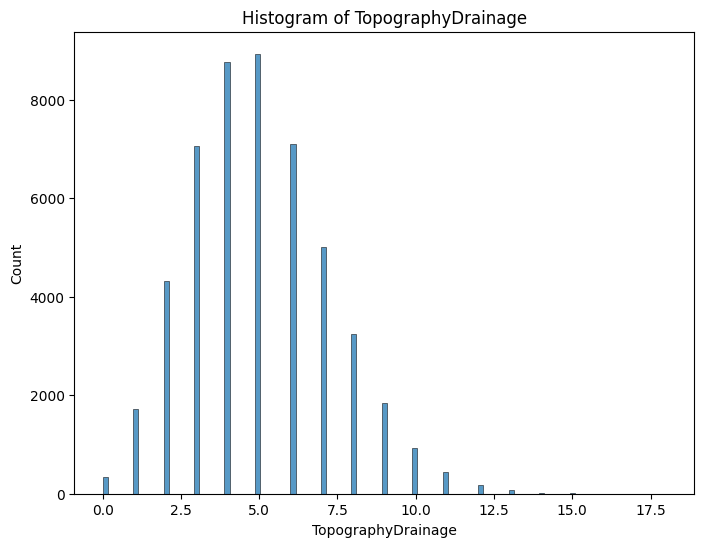

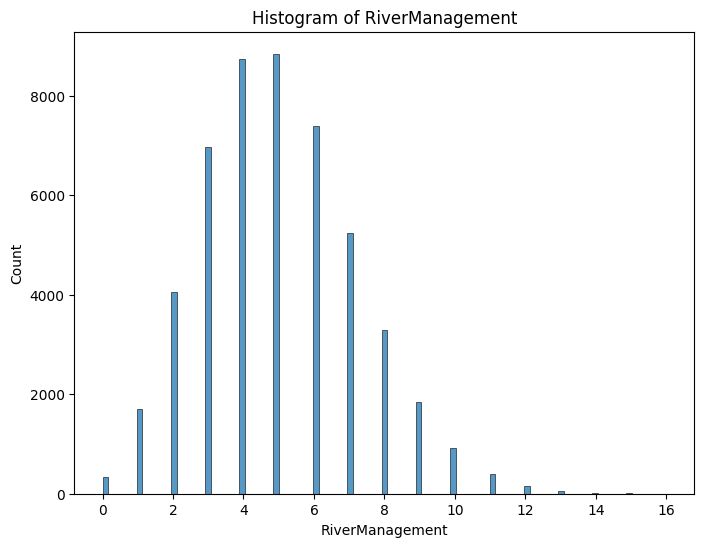

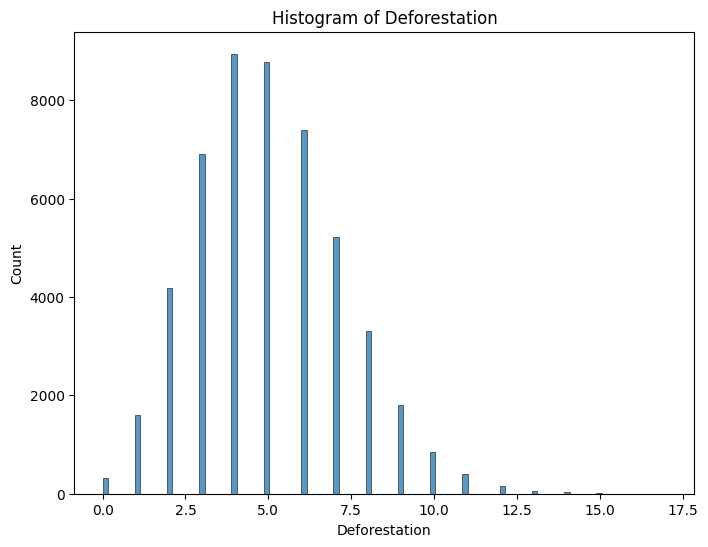

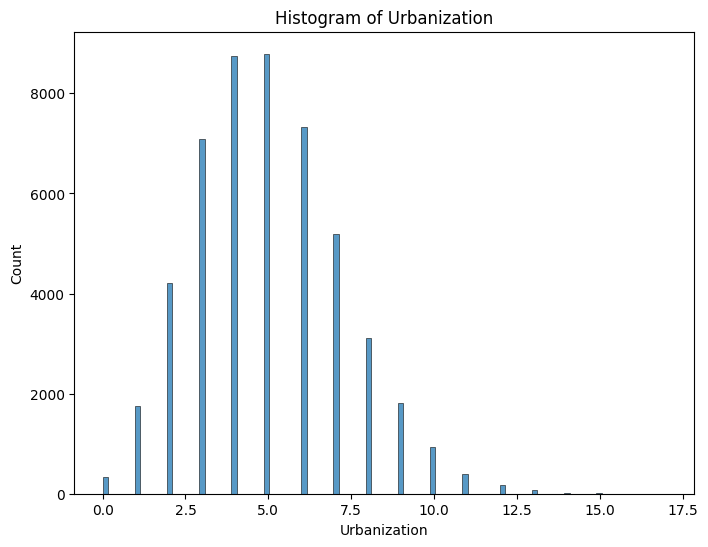

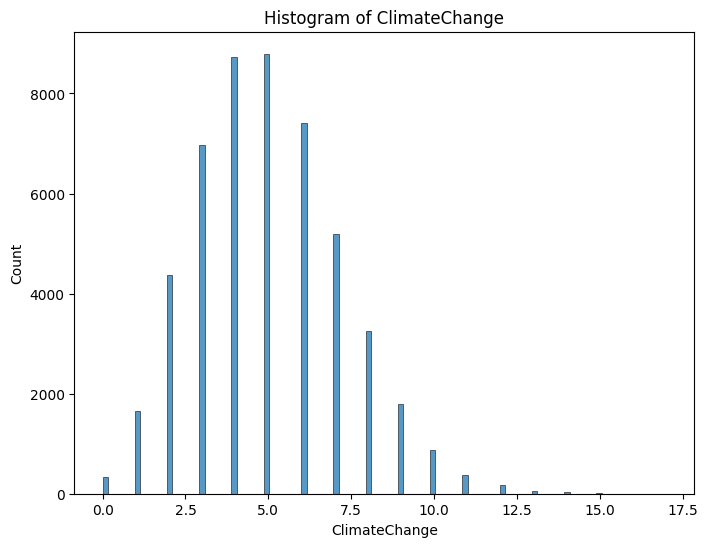

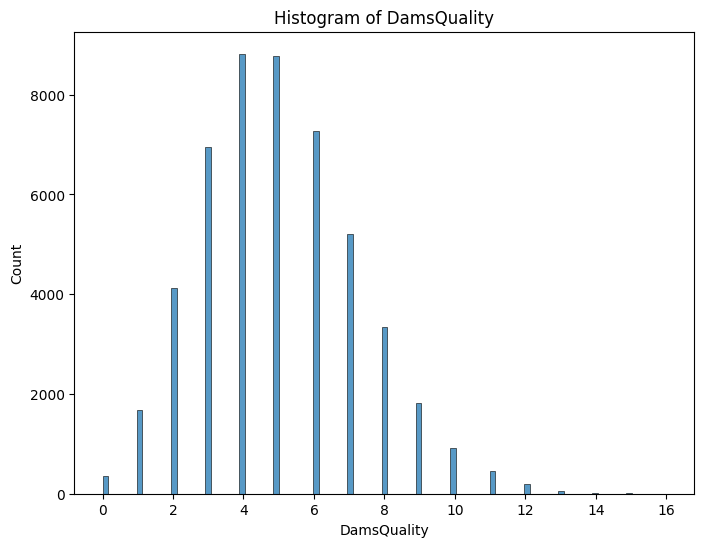

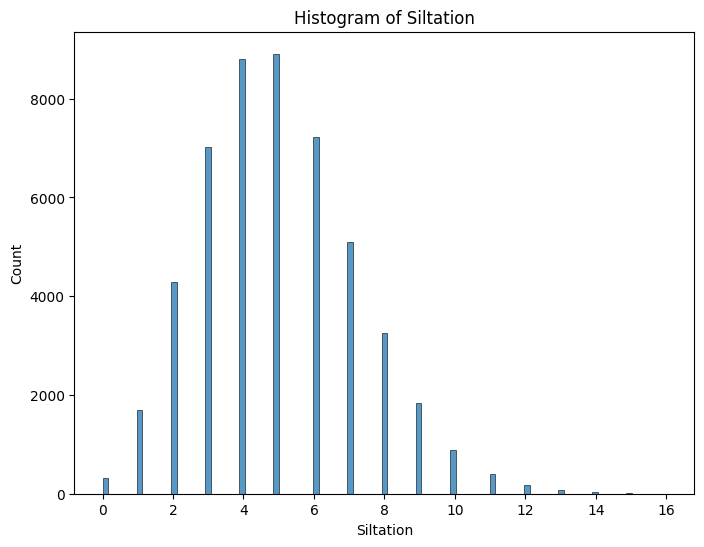

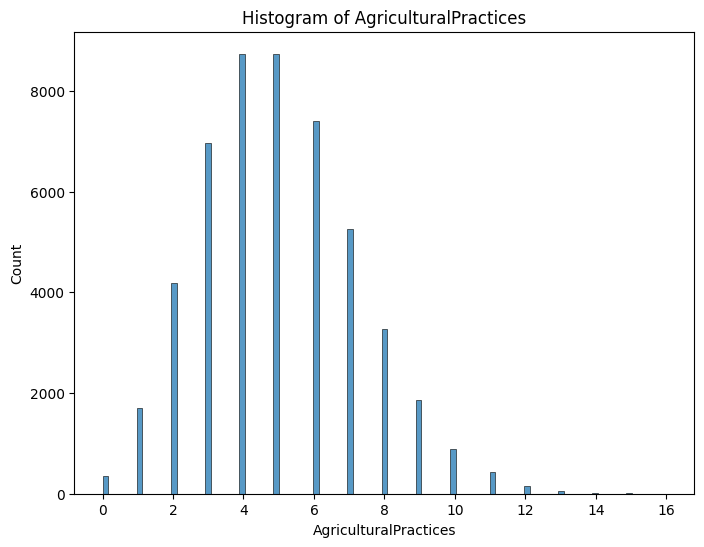

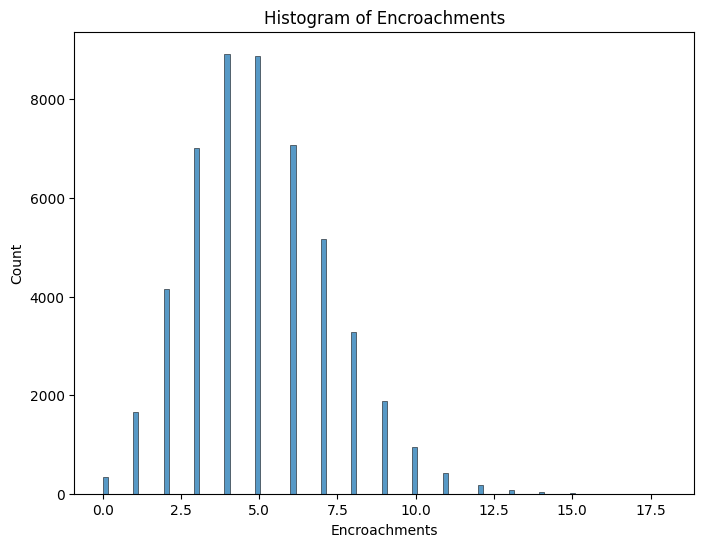

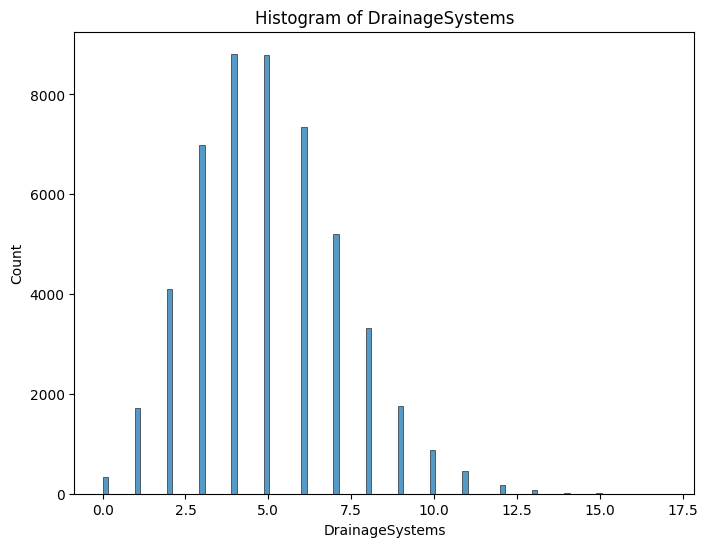

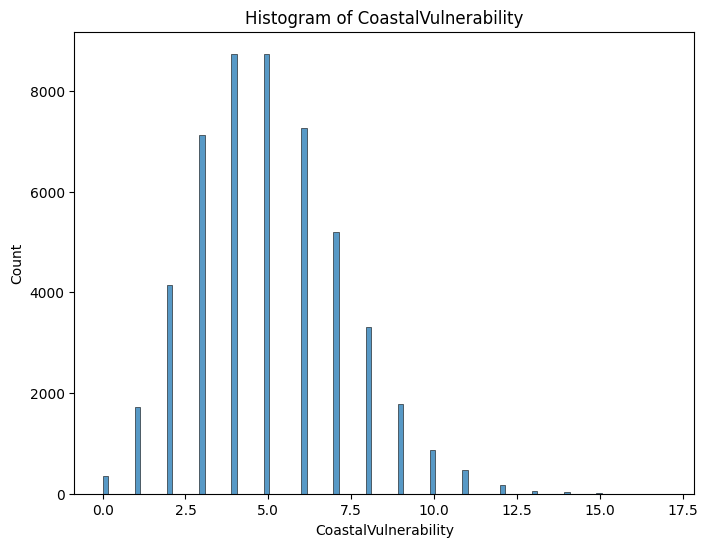

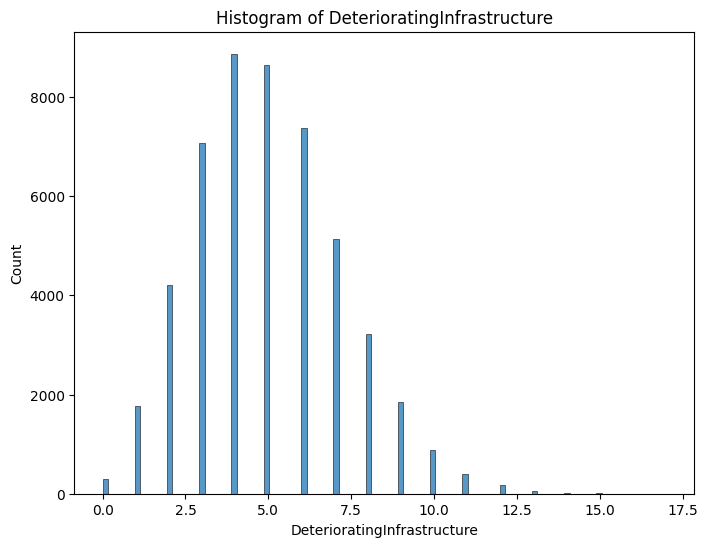

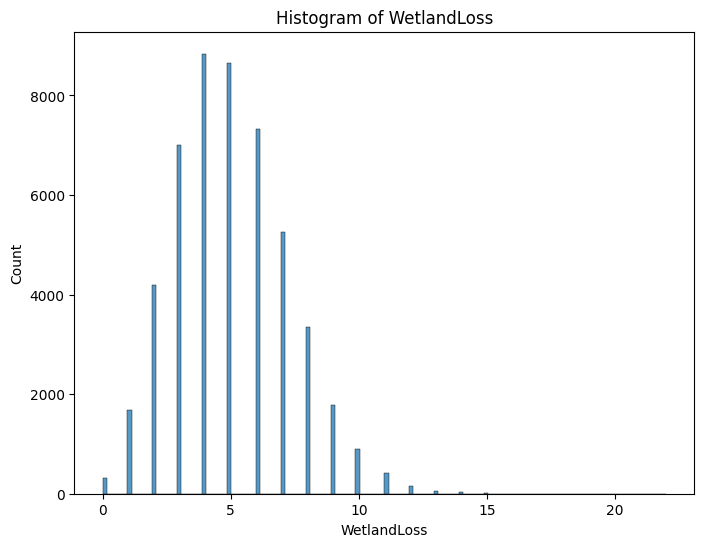

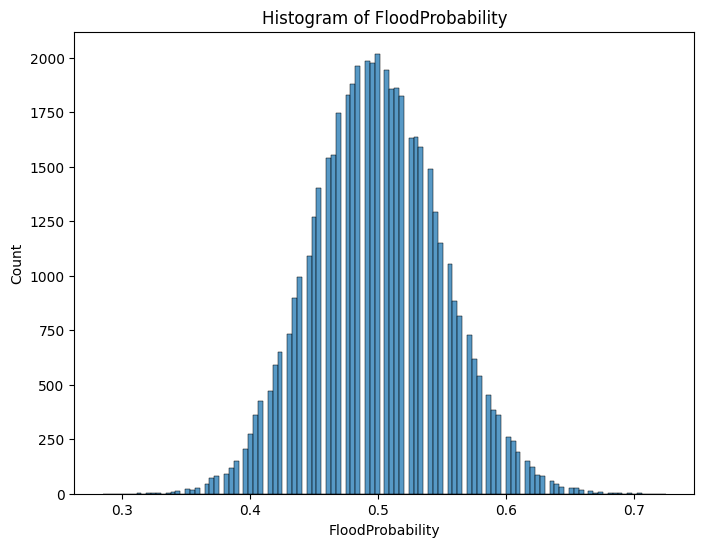

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_features.select_dtypes(include=np.number):  # итеративно идем по нашим столбцам
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_features[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

for column in df_features.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(df_features[column])
    plt.title(f'Histogram of {column}')
    plt.show()

На основе построенных визуализаций можно сделать вывод, что, во-первых, в наших данных целые значения, а, во-вторых, в качестве выброса будем считать только одну строку, где WetlandLoss > 20. Остальные данные, которые выделили ящики с усами, не будем считать за выбросы, так как их выделение связано со смещенным влево распределением

In [ ]:
df_features = df_features[df_features.WetlandLoss < 20]

In [ ]:
df_features.shape

(49999, 15)

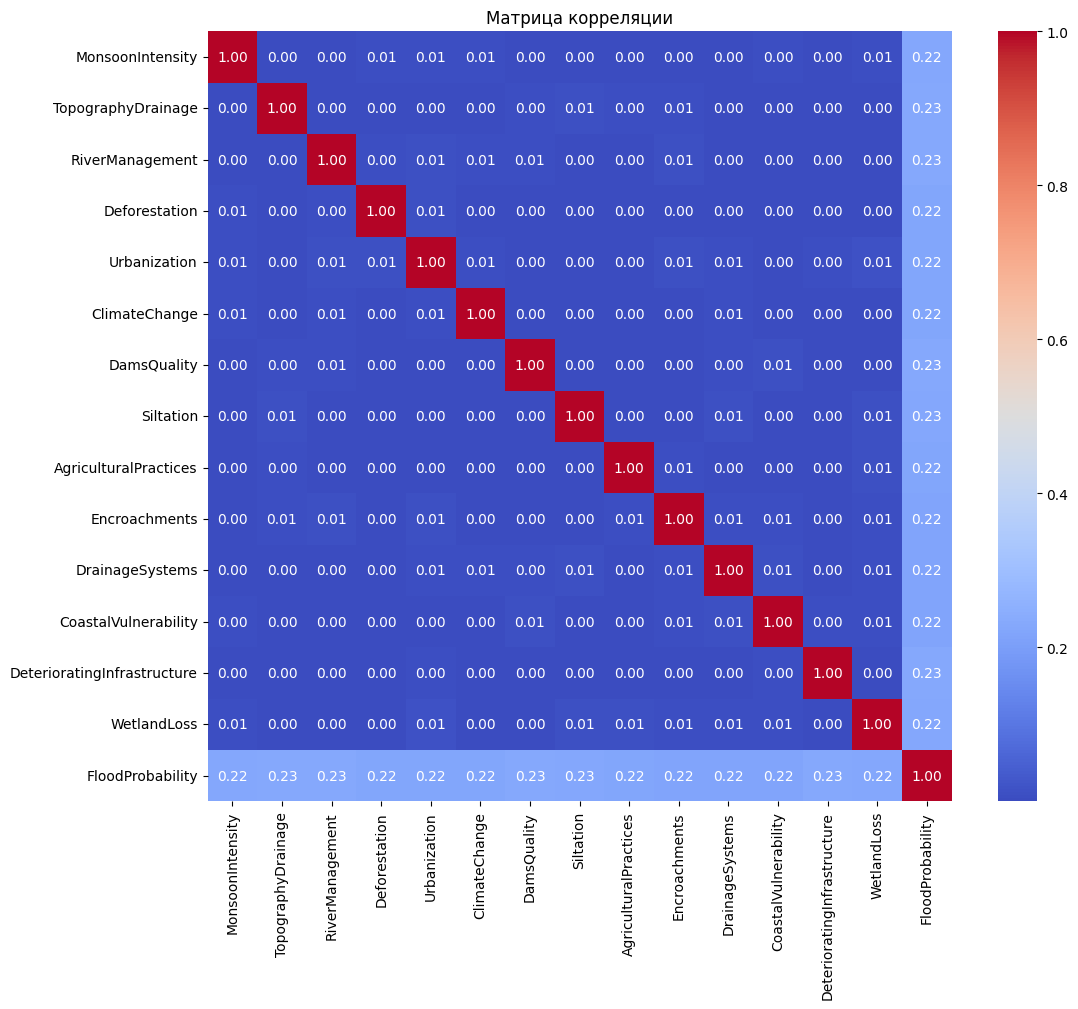

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем матрицу корреляции
corr_matrix = df_features.corr().abs()

# Визуализируем матрицу корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляции")
plt.show()

Матрица корреляции показывает, что корреляции между признаками и целевой переменной (FloodProbability) очень низкие — около 0.22–0.23 максимум. Это крайне слабая связь.

Между признаками практически нет корреляции (почти нули вне диагонали), что говорит о том, что признаки не связаны друг с другом.


In [ ]:
X = df_features.iloc[:, :-1]
y = df_features.iloc[:, -1]

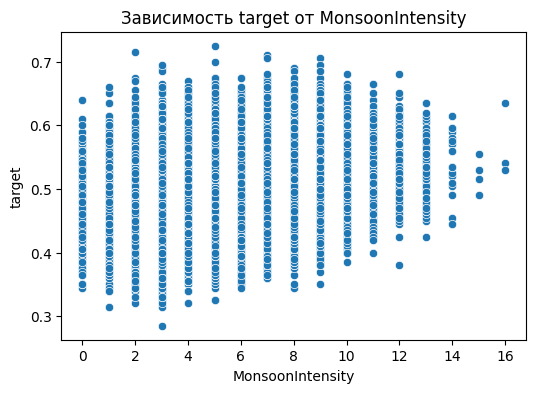

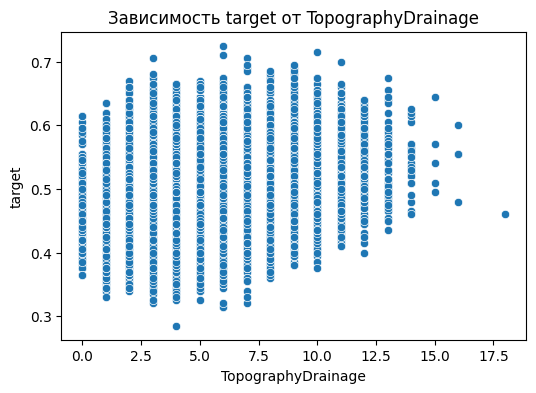

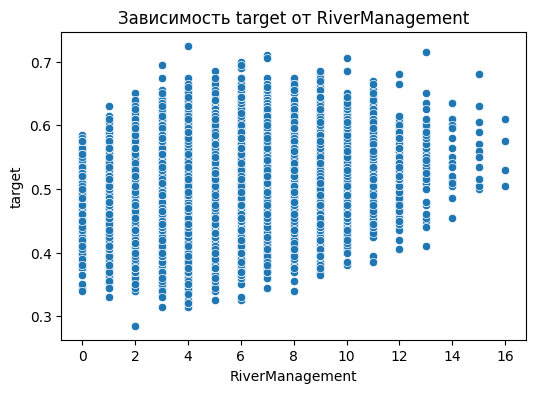

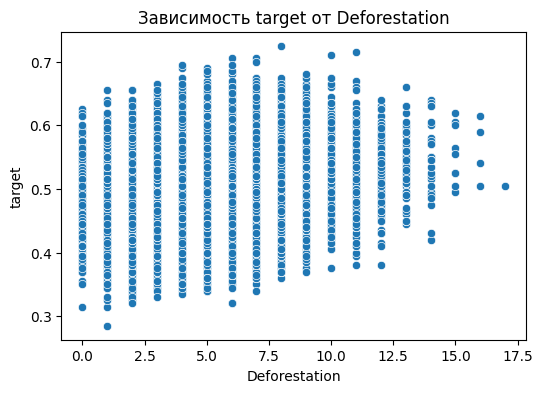

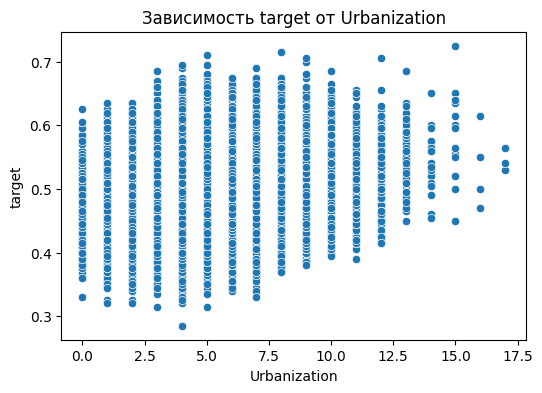

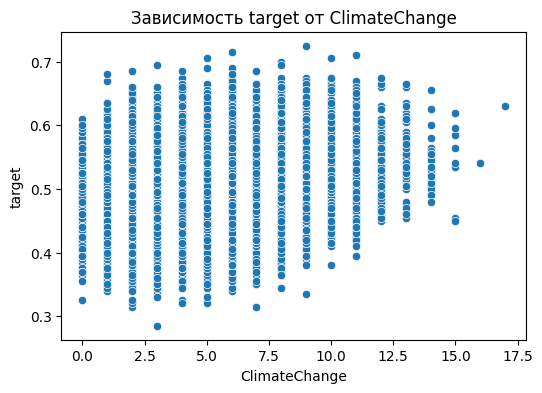

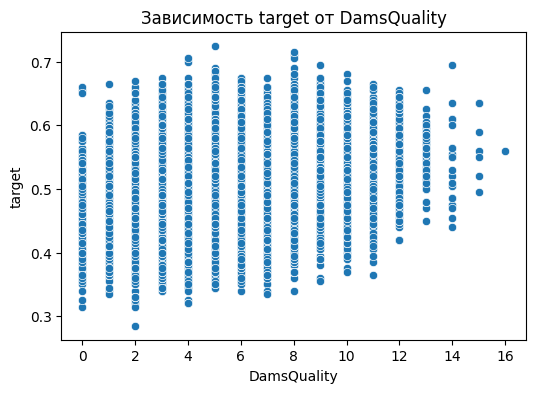

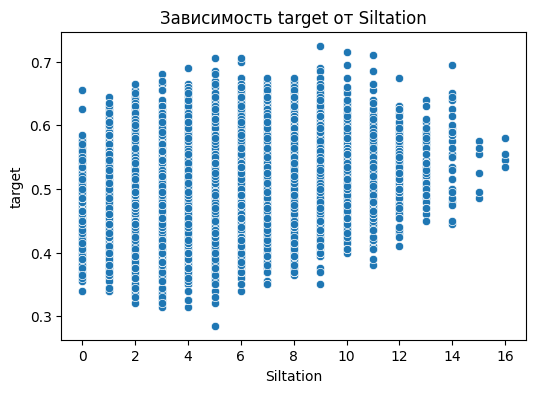

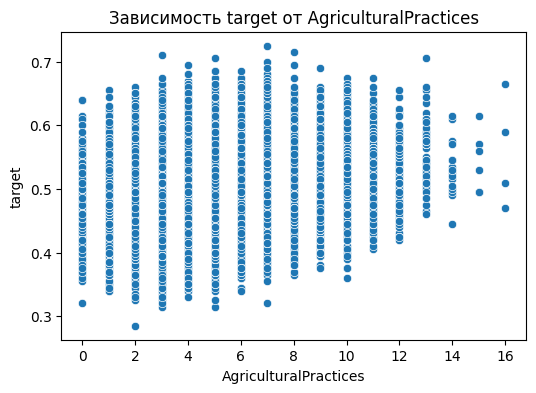

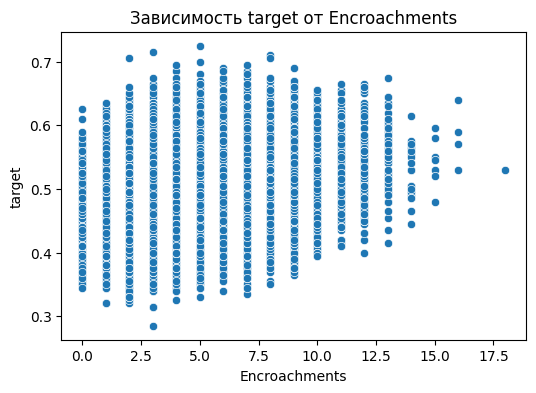

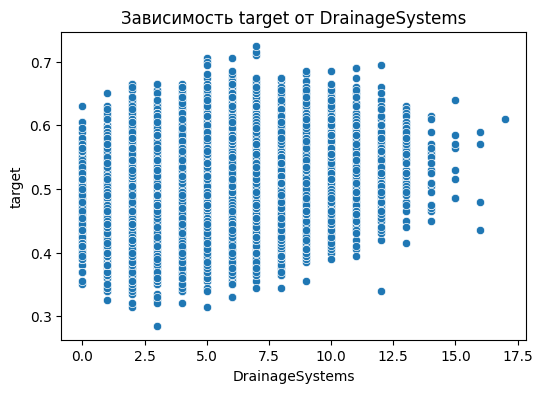

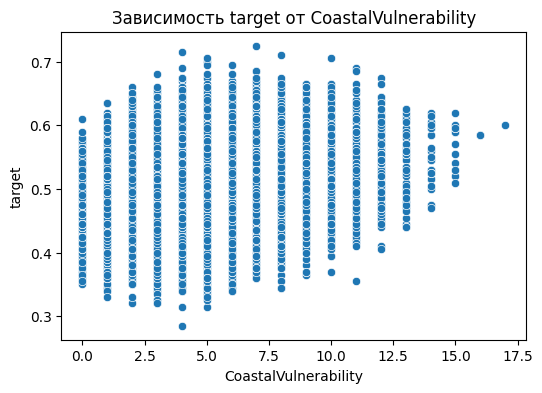

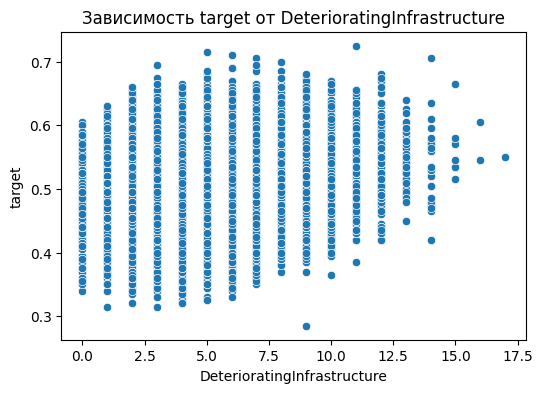

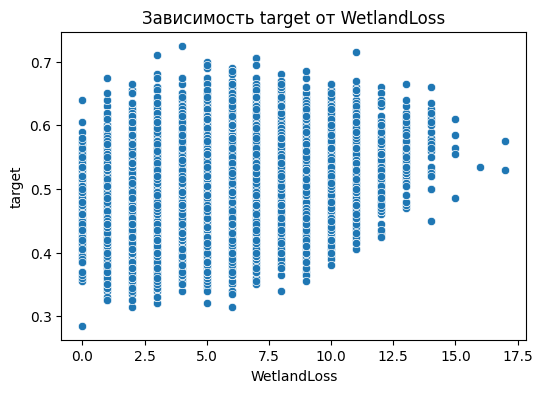

In [ ]:
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[col], y=y)
    plt.title(f'Зависимость target от {col}')
    plt.xlabel(col)
    plt.ylabel('target')
    plt.show()

Графики зависимости показывают, что при разных дискретных значениях признаков значения таргета (FloodProbability) разбросаны примерно одинаково, без очевидного тренда.

На основе матрицы корреляции и построенных графиков можно сделать вывод о том, что линейная регрессия не даст хороших результатов по следующим причинам:

*   Низкая линейная корреляция говорит о слабой линейной зависимости между признаками и таргетом
*   Дискретность признаков может создавать «ступенчатые» зависимости, которые линейная регрессия плохо моделирует
*   Вероятно, данные содержат много шума или важные признаки отсутствуют



Тем не менее построим модель и убедимся в низком качестве модели.

## Регрессия

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Обучаем линейную регрессию
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Предсказания и оценка линейной модели
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Линейная регрессия:")
print(f"Mean Squared Error: {mse_lin:.4f}")
print(f"R^2 Score: {r2_lin:.4f}")

# Вывод коэффициентов линейной регрессии
coefficients = pd.Series(lin_reg.coef_, index=X.columns)
print("\nКоэффициенты линейной регрессии:")
print(coefficients)

Линейная регрессия:
Mean Squared Error: 0.0008
R^2 Score: 0.7042

Коэффициенты линейной регрессии:
MonsoonIntensity               0.005002
TopographyDrainage             0.005103
RiverManagement                0.005006
Deforestation                  0.005028
Urbanization                   0.004943
ClimateChange                  0.004899
DamsQuality                    0.005056
Siltation                      0.005012
AgriculturalPractices          0.005070
Encroachments                  0.004957
DrainageSystems                0.005006
CoastalVulnerability           0.004996
DeterioratingInfrastructure    0.005102
WetlandLoss                    0.004957
dtype: float64


Получили хороший R2, небольшую среднеквадратическую ошибку, однако значимость признаков крайне мала, что говорит о том, что действительно влияющего признака на целевую переменную тут нет.

Дальнейшие шаги, которые можно сделать для исследования в данном направлении для регрессионной модели:

*   Попробовать преобразования независимых переменных: например, использовать полиномиальные признаки, взаимодействия, сглаживания
*   Убедиться, что дискретные значения корректно отражают процессы, влияющие на FloodProbability, попробовать добавить новые переменные
*   Применить модели, способные работать с дискретными и нелинейными зависимостями, хотя в данном случае это вряд ли поможет
*   Кластеризовать данные и рассмотреть зависимости в отдельных группах

